In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm
import tensorflow as tf
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D, experimental
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import TensorBoard
import time

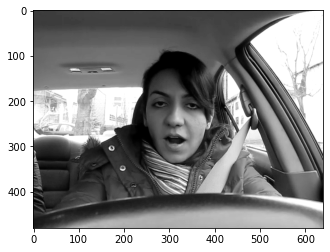

In [2]:
DATADIR = "dataset_drowsiness/train"

CATEGORIES = ["yawn", "no_yawn"]

for category in CATEGORIES:  # do dogs and cats
    path = os.path.join(DATADIR,category)  # create path to dogs and cats
    for img in os.listdir(path):  # iterate over each image per dogs and cats
        img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
        plt.imshow(img_array, cmap='gray')  # graph it
        plt.show()  # display!

        break  # we just want one for now so break
    break  #...and one more!

In [3]:
print(img_array)

[[ 61  61  61 ... 254 255 255]
 [ 61  61  61 ... 255 255 255]
 [ 61  61  61 ... 255 254 254]
 ...
 [ 25  25  26 ... 164 163 163]
 [ 25  25  26 ... 162 162 162]
 [ 25  25  26 ... 161 161 162]]


In [4]:
print(img_array.shape)

(480, 640)


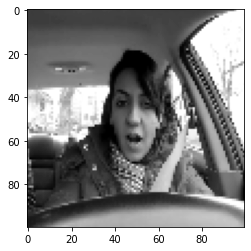

In [5]:
IMG_SIZE = 100

new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap='gray')
plt.show()

In [6]:
import random

training_data = []

data_dir = "dataset_drowsiness/train"
categories = ['yawn','no_yawn']
image_size = 100
for category in categories:
    path = os.path.join(data_dir, category)
    class_num = categories.index(category)
    for image in os.listdir(path):
        try:
            image_array = cv2.imread(os.path.join(path, image), cv2.IMREAD_GRAYSCALE)
            new_array = cv2.resize(image_array, (image_size, image_size))
            training_data.append([new_array, class_num])
        except Exception as e:
            print(e)

random.shuffle(training_data)

In [7]:
testing_data = []

data_dir = "dataset_drowsiness/test"
categories = ['yawn','no_yawn']
image_size = 100
for category in categories:
    path = os.path.join(data_dir, category)
    class_num = categories.index(category)
    for image in os.listdir(path):
        try:
            image_array = cv2.imread(os.path.join(path, image), cv2.IMREAD_GRAYSCALE)
            new_array = cv2.resize(image_array, (image_size, image_size))
            testing_data.append([new_array, class_num])
        except Exception as e:
            print(e)

random.shuffle(testing_data)

In [8]:
print(len(training_data), len(testing_data))

842 215


In [9]:
X_train = []
y_train = []

for features, label in training_data:
    X_train.append(features)
    y_train.append(label)
    
X_train = np.array(X_train).reshape(-1, image_size, image_size, 1)
X_train.shape

(842, 100, 100, 1)

In [10]:
X_test = []
y_test = []

for features, label in training_data:
    X_test.append(features)
    y_test.append(label)
    
X_test = np.array(X_test).reshape(-1, image_size, image_size, 1)
X_test.shape

(842, 100, 100, 1)

In [11]:
X_train = X_train/255.0
y_train = np.array(y_train)

X_test = X_test/255.0
y_test = np.array(y_test)

In [12]:
## tensorboard --logdir logs/ 

In [48]:
dense_layers = [1] # 1
layer_sizes = [64] # 64
conv_layers = [4] # 3
total_epochs = 15

for dense_layer in dense_layers:
    for layer_size in layer_sizes:
        for conv_layer in conv_layers:
            NAME = "{}-conv-{}-nodes-{}-dense-{}-epoch-{}".format(conv_layer, layer_size, dense_layer, total_epochs, int(time.time()))
            tensorboard = TensorBoard(log_dir=r"logs_eye_noresize/{}".format(NAME))

            model = Sequential()
            
            ## data augmentation
            model.add(experimental.preprocessing.RandomCrop(60,60))
            
            ## convolution
            model.add(Conv2D(layer_size, (3, 3), input_shape=X_train.shape[1:]))
            model.add(Activation("relu"))
            model.add(MaxPooling2D(pool_size=(2,2)))

            for i in range(conv_layer-1):
                model.add(Conv2D(layer_size, (3, 3)))
                model.add(Activation("relu"))
                model.add(MaxPooling2D(pool_size=(2,2)))
            
            ## flattening cnn to dnn
            model.add(Flatten())
            for i in range(dense_layer):
                model.add(Dense(layer_size))
                model.add(Activation("relu"))

            model.add(Dense(1))
            model.add(Activation("sigmoid"))

            model.compile(loss="binary_crossentropy", metrics=["accuracy"], optimizer="adam")
            
            ## fit
            model.fit(X_train, y_train, batch_size = 5, epochs=total_epochs, validation_split = 0.3, callbacks=[tensorboard])
            
            ## testing the model
            val_loss, val_acc = model.evaluate(X_test, y_test)
            print(val_loss, val_acc)

Epoch 1/15
118/118 [==============================] - 4s 28ms/step - loss: 0.6922 - accuracy: 0.5303 - val_loss: 0.6947 - val_accuracy: 0.4625
Epoch 2/15
118/118 [==============================] - 2s 18ms/step - loss: 0.6914 - accuracy: 0.5547 - val_loss: 0.6883 - val_accuracy: 0.5375
Epoch 3/15
118/118 [==============================] - 2s 20ms/step - loss: 0.6938 - accuracy: 0.5222 - val_loss: 0.6912 - val_accuracy: 0.5494
Epoch 4/15
118/118 [==============================] - 2s 18ms/step - loss: 0.6919 - accuracy: 0.5909 - val_loss: 0.6538 - val_accuracy: 0.6047
Epoch 5/15
118/118 [==============================] - 3s 22ms/step - loss: 0.6380 - accuracy: 0.6236 - val_loss: 0.6321 - val_accuracy: 0.6324
Epoch 6/15
118/118 [==============================] - 3s 22ms/step - loss: 0.5894 - accuracy: 0.7085 - val_loss: 0.6127 - val_accuracy: 0.6166
Epoch 7/15
118/118 [==============================] - 3s 22ms/step - loss: 0.5974 - accuracy: 0.6575 - val_loss: 0.6028 - val_accuracy: 0.6285

In [20]:
# model.save("Yawn_Tracking_CNN_aug.model")

INFO:tensorflow:Assets written to: Yawn_Tracking_CNN_aug.model\assets
